In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [189]:
df = pd.read_csv('video_games_sales.csv')

In [190]:
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [192]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [193]:
len(df)

16719

In [194]:
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating'],
      dtype='object')

In [195]:
temp = df[~df['Critic_Score'].isnull()]

## игры с более высоким рейтингом продаются лучше: проверим корреляцию

In [196]:
print(temp['Critic_Score'].corr(temp['Global_Sales']))

0.24547067750675455


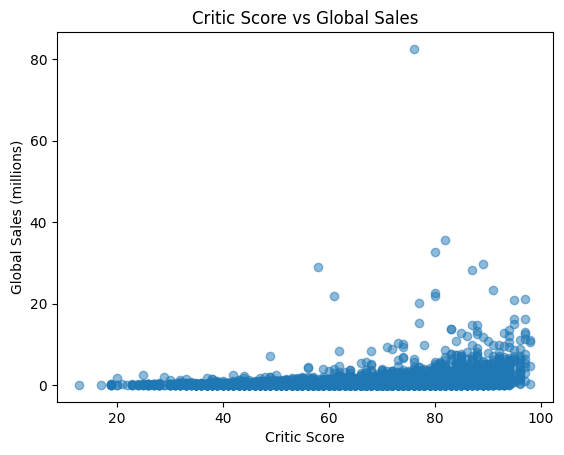

In [197]:
# визуализируем
plt.scatter(df['Critic_Score'], df['Global_Sales'], alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Global Sales (millions)')
plt.title('Critic Score vs Global Sales')
plt.show()

In [198]:
temp.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [199]:
len(temp[temp['Global_Sales'] > 15])

16

In [200]:
# действительно, выбросы влияют на корреляцию
temp = temp[temp['Global_Sales'] < 15]
print(temp['Critic_Score'].corr(temp['Global_Sales']))

0.3342535952250521


## Игры с рейтингом «E» (Everyone) продаются лучше, чем игры с рейтингом «M» (Mature).

In [201]:
sales_E = df[df['Rating'] == 'E']
sales_M = df[df['Rating'] == 'M']

/tmp/ipykernel_38176/2341530044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_E['Category'] = 'E'
/tmp/ipykernel_38176/2341530044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_M['Category'] = 'M'


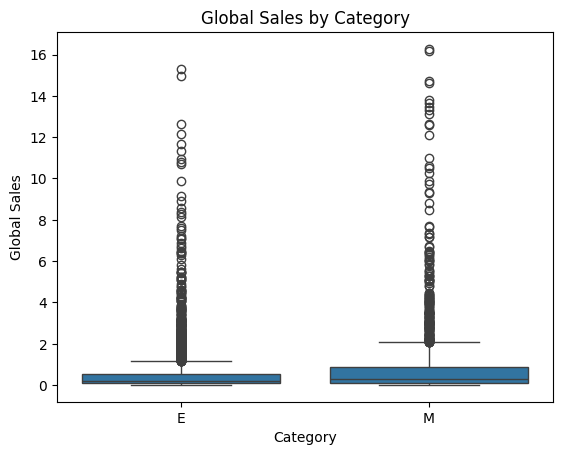

In [202]:
# построим два boxplot
sales_E['Category'] = 'E'
sales_M['Category'] = 'M'

combined = pd.concat([sales_E[sales_E['Global_Sales'] < 20], sales_M[sales_M['Global_Sales'] < 20]])

sns.boxplot(data=combined, x='Category', y='Global_Sales')
plt.xlabel('Category')
plt.ylabel('Global Sales')
plt.title('Global Sales by Category')
plt.show()

In [203]:
from scipy.stats import mannwhitneyu

# Выборки продаж для рейтингов 'E' и 'M'
sales_E = sales_E['Global_Sales'].dropna()
sales_M = sales_M['Global_Sales'].dropna()

# Выполнение теста Манна-Уитни
# Нулевая гипотеза: E <= M
# Альтернативная гипотеза: предполагаем, что E > M
stat, p_value = mannwhitneyu(sales_E, sales_M, alternative='greater')

print(f"Статистика U: {stat}")
print(f"p-value: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: игры с рейтингом 'E' продаются значимо лучше, чем 'M'.")
else:
    print("Нет достаточных оснований отвергнуть нулевую гипотезу.")

Статистика U: 2613744.5
p-value: 1.0
Нет достаточных оснований отвергнуть нулевую гипотезу.


In [204]:
from scipy.stats import mannwhitneyu

# Выполнение теста Манна-Уитни
# Нулевая гипотеза: E >= M
# Альтернативная гипотеза: предполагаем, что E < M
stat, p_value = mannwhitneyu(sales_M, sales_E, alternative='greater')

print(f"Статистика U: {stat}")
print(f"p-value: {p_value}")

# Интерпретация результата
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу: игры с рейтингом 'M' продаются значимо лучше, чем 'E'.")
else:
    print("Нет достаточных оснований отвергнуть нулевую гипотезу.")

Статистика U: 3624188.5
p-value: 2.6360009466048234e-21
Отвергаем нулевую гипотезу: игры с рейтингом 'M' продаются значимо лучше, чем 'E'.


## продажи в «Other_Sales» (остальной мир) растут со временем относительно других регионов.

In [205]:
df_subset = df[['Year_of_Release', 'Global_Sales', 'Other_Sales']].copy()
df_subset = df_subset.dropna(subset=['Year_of_Release', 'Global_Sales', 'Other_Sales'])
df_subset['Year_of_Release'] = df_subset['Year_of_Release'].astype(int)
yearly = df_subset.groupby('Year_of_Release')[['Global_Sales', 'Other_Sales']].sum()

yearly['Other_to_Global_Ratio'] = yearly['Other_Sales'] / yearly['Global_Sales']

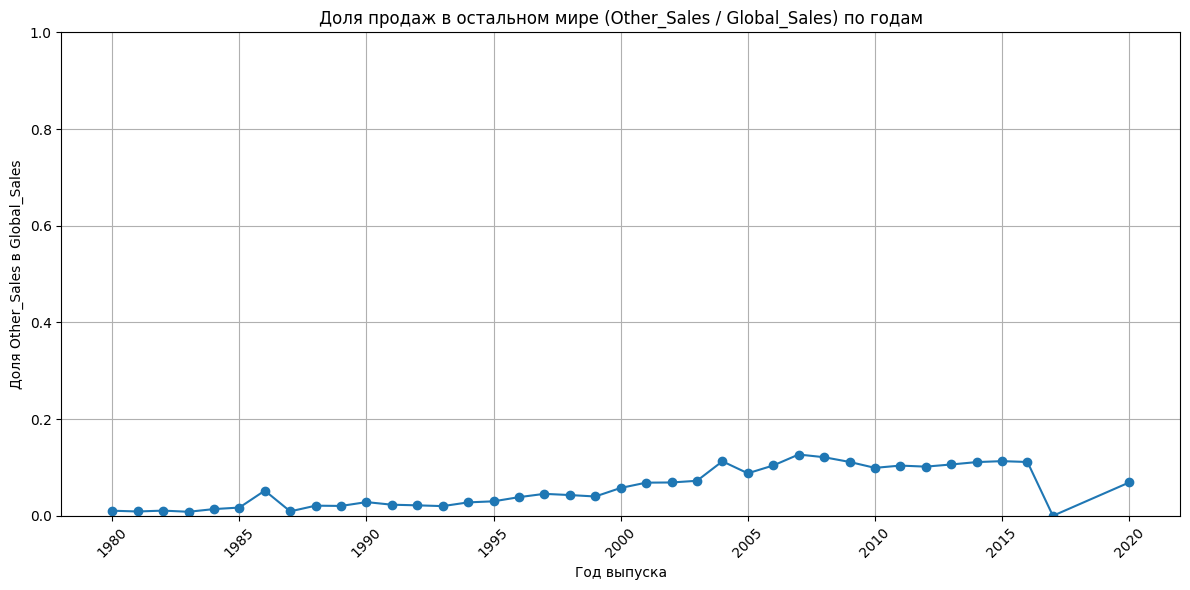

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(yearly.index, yearly['Other_to_Global_Ratio'], marker='o', linestyle='-')
plt.title('Доля продаж в остальном мире (Other_Sales / Global_Sales) по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Доля Other_Sales в Global_Sales')
plt.grid(True)
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [207]:
# есть тенденция к увеличению, кроме 2017 и 2020 года. почему?

In [208]:
print(yearly.tail())

                 Global_Sales  Other_Sales  Other_to_Global_Ratio
Year_of_Release                                                  
2014                   331.51        36.83               0.111098
2015                   268.05        30.31               0.113076
2016                   130.10        14.48               0.111299
2017                     0.06         0.00               0.000000
2020                     0.29         0.02               0.068966


In [209]:
print(len(df[df['Year_of_Release'] == 2017.]))

3


In [210]:
print(len(df[df['Year_of_Release'] == 2020.]))

1


In [211]:
# у нас слишком мало данных для 2017 и 2020 года